In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection

In [2]:
df=pd.read_csv("churn_train.csv")

In [3]:
df[ :5]

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.shape

(3333, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st          3333 non-null   object 
 1   acclen      3333 non-null   int64  
 2   arcode      3333 non-null   int64  
 3   phnum       3333 non-null   object 
 4   intplan     3333 non-null   object 
 5   voice       3333 non-null   object 
 6   nummailmes  3333 non-null   int64  
 7   tdmin       3333 non-null   float64
 8   tdcal       3333 non-null   int64  
 9   tdchar      3333 non-null   float64
 10  temin       3333 non-null   float64
 11  tecal       3333 non-null   int64  
 12  tecahr      3333 non-null   float64
 13  tnmin       3333 non-null   float64
 14  tncal       3333 non-null   int64  
 15  tnchar      3333 non-null   float64
 16  timin       3333 non-null   float64
 17  tical       3333 non-null   int64  
 18  tichar      3333 non-null   float64
 19  ncsc        3333 non-null  

## In our dataset there are 5 categorical, 1 discrete and 15 numeric columns in the given dataset:
   ### - Categorical Columns:  st,phnum,intplan,voice,label (Target)
   ### - Numerical Discrete Column:arcode
   ### - Rest of the columns are Numerical
   

## Unique Values of each column

In [6]:
for col in df:
    print(col," : ",df[col].nunique())

st  :  51
acclen  :  212
arcode  :  3
phnum  :  3333
intplan  :  2
voice  :  2
nummailmes  :  46
tdmin  :  1667
tdcal  :  119
tdchar  :  1667
temin  :  1611
tecal  :  123
tecahr  :  1440
tnmin  :  1591
tncal  :  120
tnchar  :  933
timin  :  162
tical  :  21
tichar  :  162
ncsc  :  10
label  :  2


## Details of each column

In [7]:
for col in df:
    print(col," : ",df[col].describe())
    print()

st  :  count     3333
unique      51
top         WV
freq       106
Name: st, dtype: object

acclen  :  count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: acclen, dtype: float64

arcode  :  count    3333.000000
mean      437.182418
std        42.371290
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: arcode, dtype: float64

phnum  :  count         3333
unique        3333
top       399-2457
freq             1
Name: phnum, dtype: object

intplan  :  count     3333
unique       2
top         no
freq      3010
Name: intplan, dtype: object

voice  :  count     3333
unique       2
top         no
freq      2411
Name: voice, dtype: object

nummailmes  :  count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.

#### 'nummailmes' column contains outlier

## Frequency of each record in each column

In [8]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

st
WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
CO     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: st, dtype: int64

acclen
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: acclen, Length: 212, dtype: int64

arcode
415    1655
510     840
408     838
Name: arcode, dtype: int64

phnum
399-2457    1
369-6012    1
411-8043    1
411-6211    1
363-1123    1
           ..
338-6714    1
365-5886    1
353-1941    1
407-6391    1
370-3021    1
Name: phnum, Length: 3333, dtype: int64

intplan
no     3010
yes     323
N

## Percentage of each record in each column

In [9]:
for col in df:
    print(col)
    print(df[col].value_counts()/df.shape[0],3)
    print()

st
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OR    0.023402
OH    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
ID    0.021902
MI    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
MT    0.020402
NJ    0.020402
NC    0.020402
NV    0.019802
CO    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: st, dtype: float64 3

acclen
105    0.012901
87     0.012601
93     0.012001
101    0.012001
90     0.011701
         ...   
191    0.000300
199    0.000300
215    0.000300
221    0.000300
2      0.000300
Name: acclen, Length:

## Checking for NULL values in the dataset

In [10]:
df.isna().sum()

st            0
acclen        0
arcode        0
phnum         0
intplan       0
voice         0
nummailmes    0
tdmin         0
tdcal         0
tdchar        0
temin         0
tecal         0
tecahr        0
tnmin         0
tncal         0
tnchar        0
timin         0
tical         0
tichar        0
ncsc          0
label         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st          3333 non-null   object 
 1   acclen      3333 non-null   int64  
 2   arcode      3333 non-null   int64  
 3   phnum       3333 non-null   object 
 4   intplan     3333 non-null   object 
 5   voice       3333 non-null   object 
 6   nummailmes  3333 non-null   int64  
 7   tdmin       3333 non-null   float64
 8   tdcal       3333 non-null   int64  
 9   tdchar      3333 non-null   float64
 10  temin       3333 non-null   float64
 11  tecal       3333 non-null   int64  
 12  tecahr      3333 non-null   float64
 13  tnmin       3333 non-null   float64
 14  tncal       3333 non-null   int64  
 15  tnchar      3333 non-null   float64
 16  timin       3333 non-null   float64
 17  tical       3333 non-null   int64  
 18  tichar      3333 non-null   float64
 19  ncsc        3333 non-null  

In [12]:
def meanmed(df):
     print("MEAN :",round(df.mean(),2))
     print("MEDIAN :",df.median())  
     print("DIFFERENCE :",round(df.mean(),2)-df.median())

In [13]:
meanmed (df["tdmin"])

MEAN : 179.78
MEDIAN : 179.4
DIFFERENCE : 0.37999999999999545


In [14]:
meanmed (df["ncsc"])

MEAN : 1.56
MEDIAN : 1.0
DIFFERENCE : 0.56


In [15]:
meanmed (df["tichar"])

MEAN : 2.76
MEDIAN : 2.78
DIFFERENCE : -0.020000000000000018


In [16]:
meanmed (df["tical"])

MEAN : 4.48
MEDIAN : 4.0
DIFFERENCE : 0.4800000000000004


In [17]:
meanmed (df["timin"])

MEAN : 10.24
MEDIAN : 10.3
DIFFERENCE : -0.0600000000000005


In [18]:
meanmed (df["tnchar"])

MEAN : 9.04
MEDIAN : 9.05
DIFFERENCE : -0.010000000000001563


In [19]:
meanmed (df["tncal"])

MEAN : 100.11
MEDIAN : 100.0
DIFFERENCE : 0.10999999999999943


In [20]:
meanmed (df["tnmin"])

MEAN : 200.87
MEDIAN : 201.2
DIFFERENCE : -0.3299999999999841


In [21]:
meanmed (df["tecahr"])

MEAN : 17.08
MEDIAN : 17.12
DIFFERENCE : -0.0400000000000027


In [22]:
meanmed (df["tecal"])

MEAN : 100.11
MEDIAN : 100.0
DIFFERENCE : 0.10999999999999943


In [23]:
meanmed (df["temin"])

MEAN : 200.98
MEDIAN : 201.4
DIFFERENCE : -0.4200000000000159


In [24]:
meanmed (df["tdchar"])

MEAN : 30.56
MEDIAN : 30.5
DIFFERENCE : 0.05999999999999872


In [25]:
meanmed (df["tdcal"])

MEAN : 100.44
MEDIAN : 101.0
DIFFERENCE : -0.5600000000000023


In [26]:
meanmed (df["nummailmes"])

MEAN : 8.1
MEDIAN : 0.0
DIFFERENCE : 8.1


In [27]:
nummail=np.array(df["nummailmes"])

In [28]:
iqr=np.quantile(nummail,.75)-np.quantile(nummail,.25)
tmax=np.quantile(nummail,.75)+1.5*iqr
tmax

50.0

In [29]:
tmin=np.quantile(nummail,.25)-1.5*iqr
tmin

-30.0

In [30]:
df["nummailmes"].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: nummailmes, dtype: float64

In [31]:
df["nummailmes"].nunique()

46

In [32]:
meanmed (df["acclen"])

MEAN : 101.06
MEDIAN : 101.0
DIFFERENCE : 0.060000000000002274


## Checking correlation between each column

In [33]:
correlation_df = df.corr()

In [34]:
correlation_df 

correlation_df = (df.corr().stack().sort_values(ascending=False))

correlation_df

ncsc        ncsc          1.000000
tichar      tichar        1.000000
arcode      arcode        1.000000
nummailmes  nummailmes    1.000000
tdmin       tdmin         1.000000
                            ...   
tecahr      tdcal        -0.021449
tdcal       temin        -0.021451
temin       tdcal        -0.021451
tical       arcode       -0.024179
arcode      tical        -0.024179
Length: 256, dtype: float64

In [35]:
correlation_df=correlation_df.drop_duplicates()

In [36]:
correlation_df=correlation_df.drop("ncsc")

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [37]:
correlation_df

tdmin   tdchar    1.000000
temin   tecahr    1.000000
tnchar  tnmin     0.999999
timin   tichar    0.999993
acclen  tdcal     0.038470
                    ...   
tdcal   ncsc     -0.018942
tncal   tdcal    -0.019557
tdcal   tecahr   -0.021449
        temin    -0.021451
tical   arcode   -0.024179
Length: 111, dtype: float64

In [38]:
correlation_df.index

MultiIndex([( 'tdmin', 'tdchar'),
            ( 'temin', 'tecahr'),
            ('tnchar',  'tnmin'),
            ( 'timin', 'tichar'),
            ('acclen',  'tdcal'),
            ( 'tical', 'tichar'),
            ( 'timin',  'tical'),
            ('arcode',   'ncsc'),
            ( 'tncal',  'tdmin'),
            ('tdchar',  'tncal'),
            ...
            ('tichar', 'tnchar'),
            ( 'tnmin',  'timin'),
            ( 'timin', 'tnchar'),
            ('arcode',  'timin'),
            ('arcode', 'tichar'),
            ( 'tdcal',   'ncsc'),
            ( 'tncal',  'tdcal'),
            ( 'tdcal', 'tecahr'),
            ( 'tdcal',  'temin'),
            ( 'tical', 'arcode')],
           length=111)

In [39]:
df["label"]=(df["label"]=="True.").astype(np.int) ### Changing label to 0 and 1

In [40]:
df[ :2]

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


<AxesSubplot:xlabel='temin', ylabel='tdchar'>

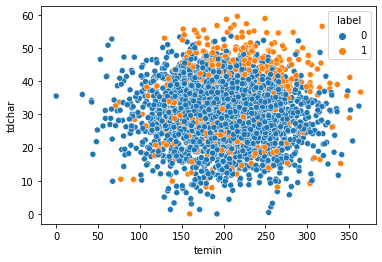

In [41]:
sns.scatterplot(x="temin",y="tdchar",hue="label",data=df)

(array([ 14.,  67., 201., 479., 798., 812., 594., 264.,  84.,  20.]),
 array([  0.  ,  35.08,  70.16, 105.24, 140.32, 175.4 , 210.48, 245.56,
        280.64, 315.72, 350.8 ]),
 <BarContainer object of 10 artists>)

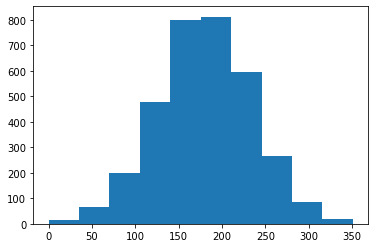

In [42]:
plt.hist(df["tdmin"])

<AxesSubplot:xlabel='label', ylabel='count'>

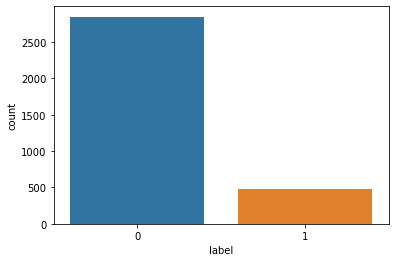

In [43]:
sns.countplot(x="label",data=df)

## Plotting each continuous column to see normally distributed or not

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acclen', ylabel='Density'>

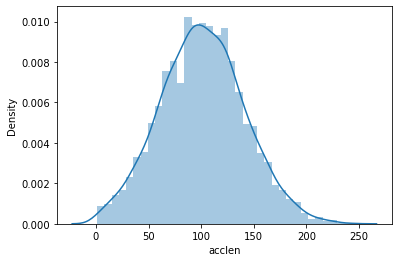

In [44]:
sns.distplot(df["acclen"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nummailmes', ylabel='Density'>

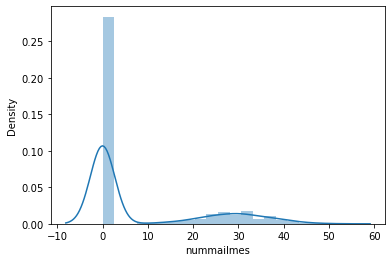

In [45]:
sns.distplot(df["nummailmes"])

#### "nummailmes" is not normally distributed

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tdmin', ylabel='Density'>

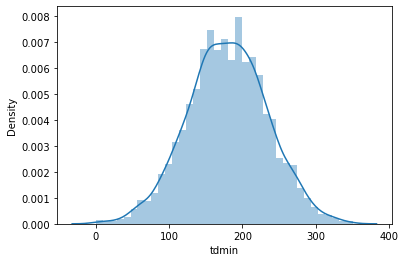

In [46]:
sns.distplot(df['tdmin'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tdcal', ylabel='Density'>

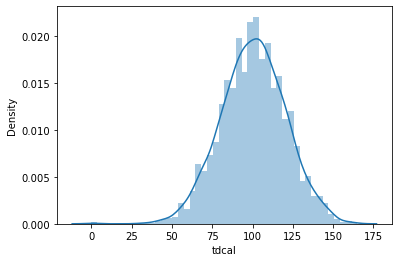

In [47]:
sns.distplot(df['tdcal'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tdchar', ylabel='Density'>

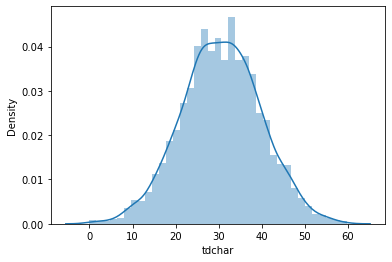

In [48]:
sns.distplot(df['tdchar'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temin', ylabel='Density'>

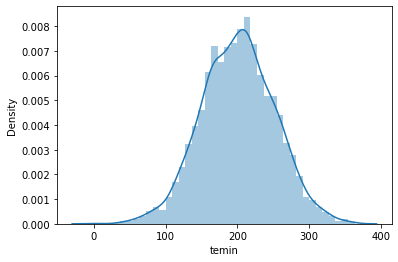

In [49]:
sns.distplot(df['temin'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tecal', ylabel='Density'>

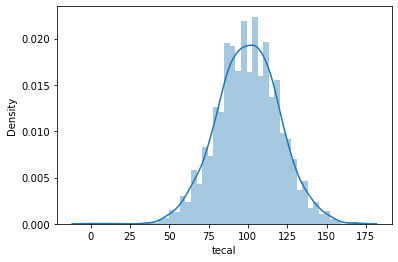

In [50]:
sns.distplot(df['tecal'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tecahr', ylabel='Density'>

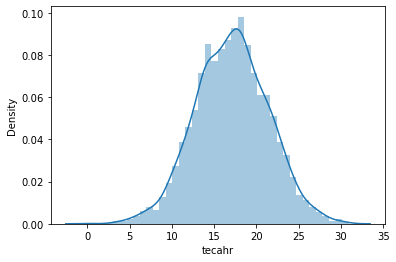

In [51]:
sns.distplot(df['tecahr'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tnmin', ylabel='Density'>

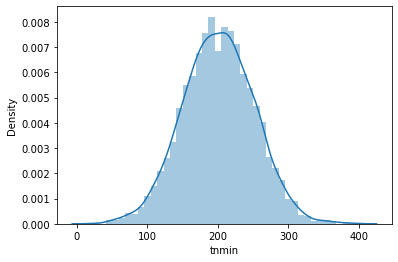

In [52]:
sns.distplot(df['tnmin'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tncal', ylabel='Density'>

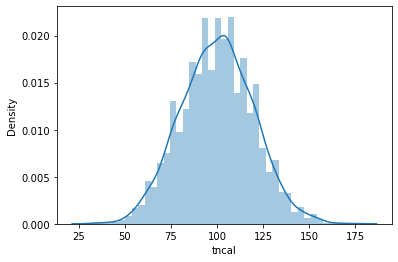

In [53]:
sns.distplot(df['tncal'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tnchar', ylabel='Density'>

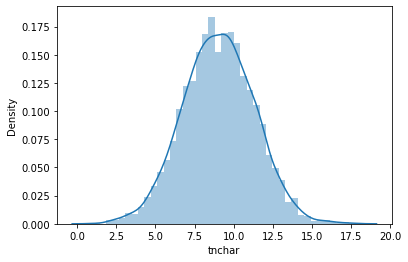

In [54]:
sns.distplot(df['tnchar'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='timin', ylabel='Density'>

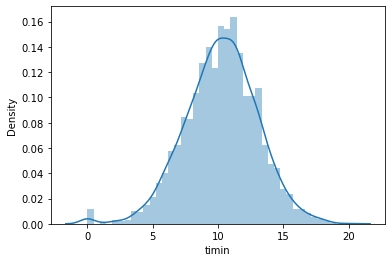

In [55]:
sns.distplot(df['timin'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tical', ylabel='Density'>

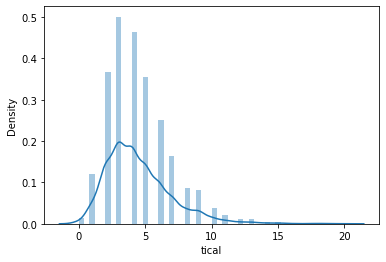

In [56]:
sns.distplot(df['tical'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tichar', ylabel='Density'>

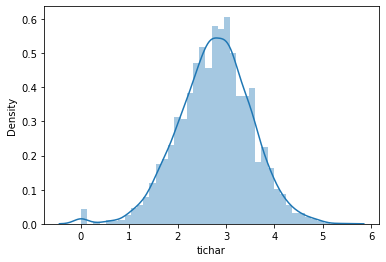

In [57]:
sns.distplot(df['tichar'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ncsc', ylabel='Density'>

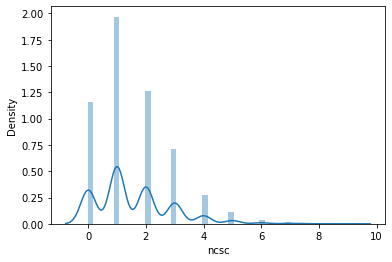

In [58]:
sns.distplot(df['ncsc'])

#### all continuous columns are normally distributed but only "nummailmes" is not normally distributed

In [59]:
df.columns

Index(['st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tncal', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'label'],
      dtype='object')

## Analysing continuous columns wrt a categorical column

<AxesSubplot:xlabel='label', ylabel='acclen'>

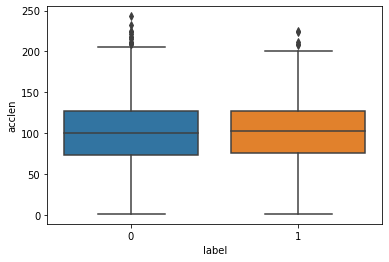

In [60]:
sns.boxplot(y="acclen",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "acclen" is same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='nummailmes'>

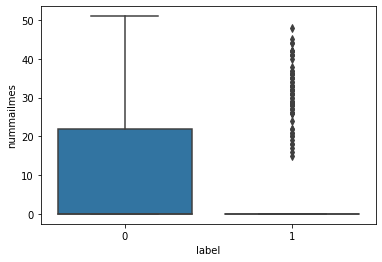

In [61]:
sns.boxplot(y="nummailmes",x="label",data=df) 

#### From the above boxplot it is observed that if the no of "nummailmes" is low then there is a high possibility that the cusmoter will not churn and if the no of "nummailmes" is high then there is a low possibility that the cusmoter will churn

<AxesSubplot:xlabel='label', ylabel='tdmin'>

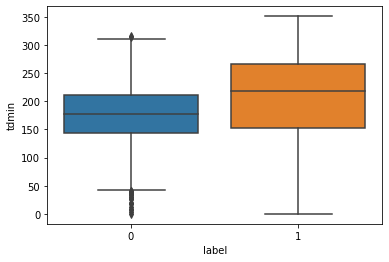

In [62]:
sns.boxplot(y="tdmin",x="label",data=df) 

#### From the above boxplot it is observed that "tdmin"  for churners are more than non churners

<AxesSubplot:xlabel='label', ylabel='tdcal'>

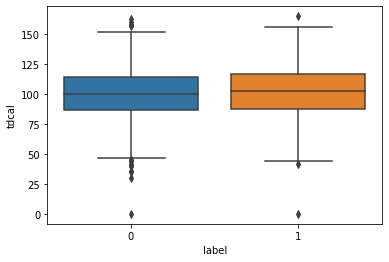

In [63]:
sns.boxplot(y="tdcal",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tdcal" is same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tdchar'>

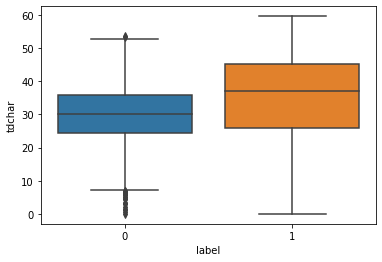

In [64]:
sns.boxplot(y="tdchar",x="label",data=df) 

#### From the above boxplot it is observed that "tdchar" for churners are more than non churners

<AxesSubplot:xlabel='label', ylabel='temin'>

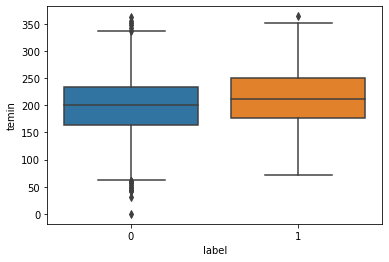

In [65]:
sns.boxplot(y="temin",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "temin" is slightly more for churners than non churners

<AxesSubplot:xlabel='label', ylabel='tecal'>

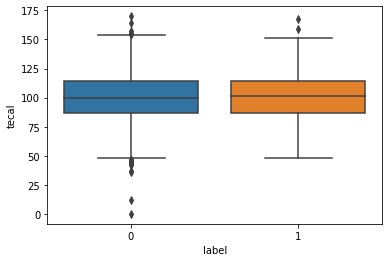

In [66]:
sns.boxplot(y="tecal",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tecal" is same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tecahr'>

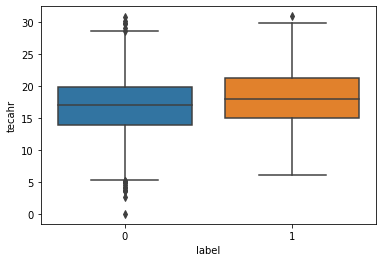

In [67]:
sns.boxplot(y="tecahr",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tecahr" is almost same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tnmin'>

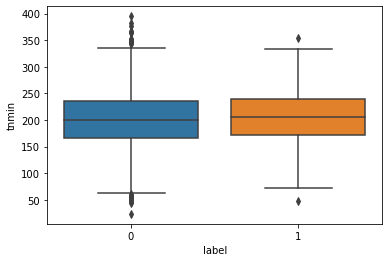

In [68]:
sns.boxplot(y="tnmin",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tnmin" is almost same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tncal'>

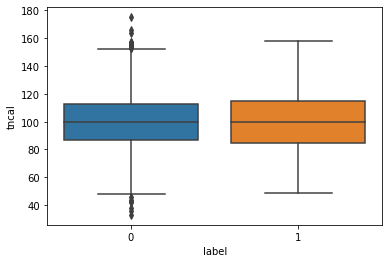

In [69]:
sns.boxplot(y="tncal",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tncal" is same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tnchar'>

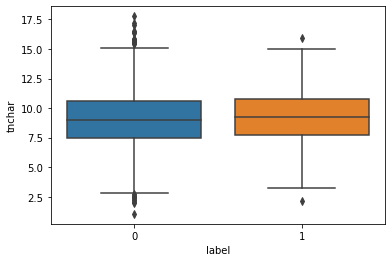

In [70]:
sns.boxplot(y="tnchar",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tnchar" is same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='timin'>

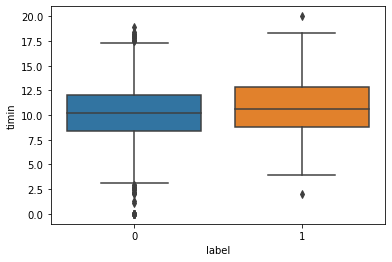

In [71]:
sns.boxplot(y="timin",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "timin" is almost same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tical'>

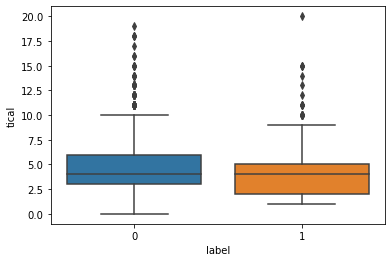

In [72]:
sns.boxplot(y="tical",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tical" is almost same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='tichar'>

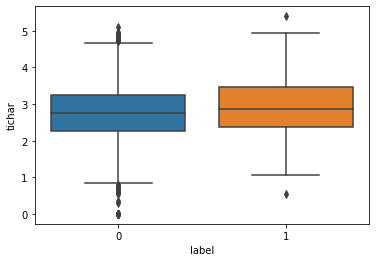

In [73]:
sns.boxplot(y="tichar",x="label",data=df) 

#### From the above boxplot it is observed that the boxplot of "tichar" is almost same for churners as well as non churners

<AxesSubplot:xlabel='label', ylabel='ncsc'>

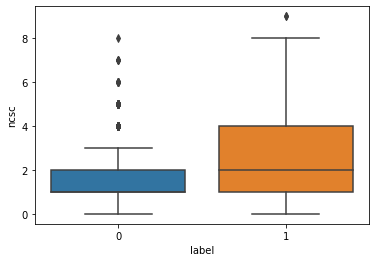

In [74]:
sns.boxplot(y="ncsc",x="label",data=df) 

#### From the above boxplot it is observed that "ncsc" for churners are more than non churners

## Analysing categorical columns wrt a categorical column

<AxesSubplot:xlabel='arcode', ylabel='count'>

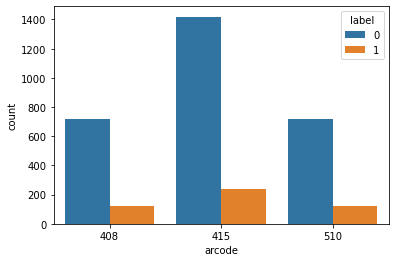

In [75]:
sns.countplot(x="arcode", hue="label", data=df)

In [76]:
pd.crosstab(index=df["arcode"], columns=df["label"], normalize="index" )

label,0,1
arcode,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


#### From the above result it is observed that chances of churning is very low in the given "arcode"

<AxesSubplot:xlabel='intplan', ylabel='count'>

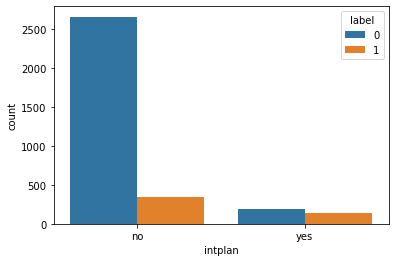

In [77]:
sns.countplot(x="intplan", hue="label", data=df)

In [78]:
pd.crosstab(index=df["intplan"], columns=df["label"], normalize="index" )

label,0,1
intplan,,
no,0.885050,0.114950
yes,0.575851,0.424149


#### From the above result it is observed that chances of churning is very high for customer with "intplan" 

<AxesSubplot:xlabel='voice', ylabel='count'>

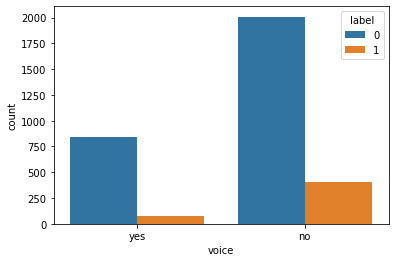

In [79]:
sns.countplot(x="voice", hue="label", data=df)

In [80]:
pd.crosstab(index=df["voice"], columns=df["label"], normalize="index" )

label,0,1
voice,,
no,0.832849,0.167151
yes,0.913232,0.086768


#### From the above result it is observed that chances of churning is very low if  "voice" is "yes"

<AxesSubplot:xlabel='st', ylabel='count'>

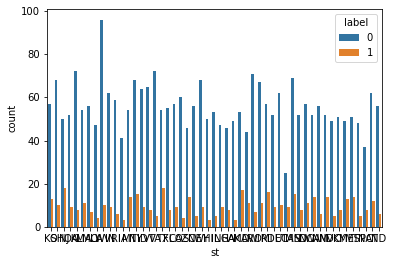

In [81]:
sns.countplot(x="st", hue="label", data=df)

In [82]:
pd.crosstab(index=df["st"], columns=df["label"], normalize="index" )

label,0,1
st,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541


#### From the above result it is observed that chances of churning is more if "st" is "CA" & "NJ" than rest of the "st"

In [83]:
df[ :2]

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [84]:
X=df.drop({"phnum","label"}, axis=1)

In [85]:
y=df["label"]

In [86]:
X.shape

(3333, 19)

In [87]:
catcols=list(X.select_dtypes(include="object").columns)
catcols

['st', 'intplan', 'voice']

In [88]:
catcols.append("arcode")
catcols ### Categorical columns

['st', 'intplan', 'voice', 'arcode']

### Performing OHE on categorical columns

In [89]:
xdfohe=pd.get_dummies(X,columns=catcols,drop_first=True)
xdfohe[ :2]

,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,...,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,intplan_yes,voice_yes,arcode_415,arcode_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,1,1,0


In [90]:
xdfohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acclen       3333 non-null   int64  
 1   nummailmes   3333 non-null   int64  
 2   tdmin        3333 non-null   float64
 3   tdcal        3333 non-null   int64  
 4   tdchar       3333 non-null   float64
 5   temin        3333 non-null   float64
 6   tecal        3333 non-null   int64  
 7   tecahr       3333 non-null   float64
 8   tnmin        3333 non-null   float64
 9   tncal        3333 non-null   int64  
 10  tnchar       3333 non-null   float64
 11  timin        3333 non-null   float64
 12  tical        3333 non-null   int64  
 13  tichar       3333 non-null   float64
 14  ncsc         3333 non-null   int64  
 15  st_AL        3333 non-null   uint8  
 16  st_AR        3333 non-null   uint8  
 17  st_AZ        3333 non-null   uint8  
 18  st_CA        3333 non-null   uint8  
 19  st_CO 

In [91]:
numcols=list(X.select_dtypes(exclude="object").columns)
numcols.remove("arcode")
numcols  # Continuous columns

['acclen',
 'nummailmes',
 'tdmin',
 'tdcal',
 'tdchar',
 'temin',
 'tecal',
 'tecahr',
 'tnmin',
 'tncal',
 'tnchar',
 'timin',
 'tical',
 'tichar',
 'ncsc']

In [92]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

In [93]:
# Splitting into train and test data
from sklearn import model_selection
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(xdfohe,y,test_size=.2,random_state=42)
Xtrain.shape

(2666, 69)

In [94]:
Xtrain[ :2]

,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,...,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,intplan_yes,voice_yes,arcode_415,arcode_510
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,...,0,0,0,0,0,0,0,0,0,1
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,...,0,0,0,0,0,0,0,0,1,0


In [95]:
Xtest.shape

(667, 69)

### Performing Scaling of continuous columns

In [96]:
scaler=preprocessing.StandardScaler()
Xtrain[numcols]=scaler.fit_transform(Xtrain[numcols])
Xtest[numcols]=scaler.transform(Xtest[numcols])

In [97]:
Xtrain[ :2]

,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,...,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,intplan_yes,voice_yes,arcode_415,arcode_510
817,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,...,0,0,0,0,0,0,0,0,0,1
1373,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,...,0,0,0,0,0,0,0,0,1,0


In [98]:
from sklearn import metrics

In [99]:
def printscores(actual,pred):
    print("AUC:",metrics.roc_auc_score(actual,pred))
    print("accuracy:",metrics.accuracy_score(actual,pred))
    print("recall  :",metrics.recall_score(actual,pred))
    print("precision :",metrics.precision_score(actual,pred))
    print("f1-score : ",metrics.f1_score(actual,pred))

## Fitting training data into a LogisticRegression model with all columns

In [100]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
testpred=model.predict(Xtest)
trainpred=model.predict(Xtrain)

### Predicting with train and test data

In [101]:
testpred=model.predict(Xtest)
trainpred=model.predict(Xtrain)

### Checking metrics of the model (all columns included)

In [102]:
printscores(ytrain,trainpred)

AUC: 0.6157941427274645
accuracy: 0.872093023255814
recall  : 0.25654450261780104
precision : 0.632258064516129
f1-score :  0.3649906890130354


In [103]:
printscores(ytest,testpred)

AUC: 0.575858027498863
accuracy: 0.8530734632683659
recall  : 0.1782178217821782
precision : 0.5454545454545454
f1-score :  0.26865671641791045


### Reducing no of columns using RFE

In [104]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(linear_model.LogisticRegression(),n_features_to_select=30)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['tdmin', 'tdchar', 'temin', 'ncsc', 'st_AL', 'st_AR', 'st_AZ', 'st_CA',
       'st_HI', 'st_IL', 'st_KS', 'st_LA', 'st_MD', 'st_ME', 'st_MI', 'st_MN',
       'st_MS', 'st_MT', 'st_ND', 'st_NJ', 'st_NV', 'st_PA', 'st_RI', 'st_SC',
       'st_TX', 'st_VA', 'st_VT', 'st_WA', 'intplan_yes', 'voice_yes'],
      dtype='object')

### Checking the colinearity of 30 important columns

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifdf = pd.DataFrame() 
vifdf['Features'] = Xtrain[impcols].columns
vifdf['VIF'] = [ variance_inflation_factor(Xtrain[impcols].values, i) for i in range(Xtrain[impcols].shape[1])]
vifdf

,Features,VIF
0,tdmin,1.065417e+07
1,tdchar,1.065416e+07
2,temin,1.012692e+00
3,ncsc,1.012128e+00
4,st_AL,1.012615e+00
5,st_AR,1.014110e+00
6,st_AZ,1.011560e+00
7,st_CA,1.004405e+00
8,st_HI,1.011903e+00
9,st_IL,1.021704e+00


## Checking the significance of 30 columns

In [106]:
import statsmodels.api as sm
Xtrainsm=sm.add_constant(Xtrain[impcols])
model = sm.GLM(  ytrain ,  Xtrainsm,  family = sm.families.Binomial())
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:                 2666
Model:                            GLM   Df Residuals:                     2635
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -843.21
Date:                Thu, 17 Feb 2022   Deviance:                       1686.4
Time:                        20:02:19   Pearson chi2:                 2.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3641      0.107    -22.092      0.000      -2.574      -2.154
tdmin        -115.6565    205.156     -0.564      0.573    -517.756     286.443
tdchar        116.2964    205.157      0.567      0.571    -285.803     518.396
temin           0.3037      0.065      4.640      0.000       0.175       0.432
ncsc            0.6895      0.059     11.756      0.000       0.575       0.804
st_AL          -1.0546      0.575     -1.833      0.067      -2.182       0.073
st_AR           0.5184      0.432      1.200      0.230      -0.329       1.365
st_AZ          -0.7159      0.644     -1.111      0.266      -1.979       0.547
st_CA           0.8542      0.523      1.632      0.103      -0.171       1.880
st_HI          -0.8237      0.647     -1.273      0.203      -2.092       0.445
st_IL          -0.9150      0.600     -1.524      0.127      -2.092       0.262
st_KS           0.6237      0.385      1.622      0.105      -0.130       1.378
st_LA          -0.4395      0.624     -0.704      0.481      -1.663       0.784
st_MD           0.4405      0.362      1.217      0.224      -0.269       1.150
st_ME           0.6399      0.409      1.566      0.117      -0.161       1.441
st_MI           0.5335      0.370      1.442      0.149      -0.192       1.259
st_MN           0.6408      0.364      1.762      0.078      -0.072       1.354
st_MS           0.5910      0.448      1.319      0.187      -0.287       1.469
st_MT           1.0197      0.380      2.681      0.007       0.274       1.765
st_ND          -1.7972      0.795     -2.261      0.024      -3.355      -0.239
st_NJ           0.9219      0.362      2.549      0.011       0.213       1.631
st_NV           0.7320      0.375      1.950      0.051      -0.004       1.468
st_PA           0.7296      0.499      1.462      0.144      -0.249       1.708
st_RI          -0.5948      0.584     -1.018      0.309      -1.740       0.550
st_SC           1.1826      0.401      2.946      0.003       0.396       1.969
st_TX           1.0275      0.343      2.995      0.003       0.355       1.700
st_VA          -0.6800      0.517     -1.316      0.188      -1.693       0.333
st_VT          -1.3310      0.675     -1.971      0.049      -2.655      -0.007
st_WA           0.4988      0.394      1.265      0.206      -0.274       1.272
intplan_yes     2.2122      0.168     13.150      0.000       1.883       2.542
voice_yes      -0.9653      0.167     -5.785      0.000      -1.292      -0.638
===============================================================================
"""

#### "tdmin","tdchar","st_RI","st_MD","st_HI","st_AZ',"st_AR" - Non- significant Columns

## Fitting training data with 30 columns into LogisticRegression model

In [107]:
model=linear_model.LogisticRegression()
model.fit(Xtrain[impcols],ytrain)
trainpred=model.predict(Xtrain[impcols])
testpred=model.predict(Xtest[impcols])

### Checking metrics of the model (30 columns included)

In [108]:
printscores(ytrain,trainpred)

AUC: 0.5841662005666555
accuracy: 0.8645911477869468
recall  : 0.19109947643979058
precision : 0.584
f1-score :  0.2879684418145957


In [109]:
#AUC: 0.6157941427274645
#accuracy: 0.872093023255814
#recall  : 0.25654450261780104
#precision : 0.632258064516129
#f1-score :  0.3649906890130354
    #Previous

In [110]:
printscores(ytest,testpred)

AUC: 0.5610065423503481
accuracy: 0.848575712143928
recall  : 0.1485148514851485
precision : 0.5
f1-score :  0.22900763358778625


In [111]:
#AUC: 0.575858027498863
#accuracy: 0.8530734632683659
#recall  : 0.1782178217821782
#precision : 0.5454545454545454
#f1-score :  0.26865671641791045
    #Previous

### Reducing no of columns using RFE

In [112]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(linear_model.LogisticRegression(),n_features_to_select=15)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['tdchar', 'ncsc', 'st_AL', 'st_AZ', 'st_HI', 'st_IL', 'st_MT', 'st_ND',
       'st_NJ', 'st_SC', 'st_TX', 'st_VA', 'st_VT', 'intplan_yes',
       'voice_yes'],
      dtype='object')

In [113]:
#rfeobj=feature_selection.RFE(linear_model.LogisticRegression())
#params={"n_features_to_select":list(range(15,60))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=params,scoring="recall",cv=5,return_train_score=True)

In [114]:
#gridobj.fit(Xtrain,ytrain)

In [115]:
#gridobj.best_score_

In [116]:
ytrain.value_counts()/ytrain.shape[0]

0    0.856714
1    0.143286
Name: label, dtype: float64

In [117]:
#gridobj.best_params_

In [118]:
#model=gridobj.best_estimator_

In [119]:
#Xtrain.columns[model.support_]

### Checking the P value for significant column

In [120]:
import statsmodels.api as sm
Xtrainsm=sm.add_constant(Xtrain[impcols])
model = sm.GLM(  ytrain ,  Xtrainsm,  family = sm.families.Binomial())
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:                 2666
Model:                            GLM   Df Residuals:                     2650
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.78
Date:                Thu, 17 Feb 2022   Deviance:                       1727.6
Time:                        20:02:23   Pearson chi2:                 2.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1662      0.089    -24.424      0.000      -2.340      -1.992
tdchar          0.6372      0.064      9.894      0.000       0.511       0.763
ncsc            0.6691      0.057     11.639      0.000       0.556       0.782
st_AL          -1.1890      0.561     -2.118      0.034      -2.289      -0.089
st_AZ          -1.0017      0.645     -1.553      0.120      -2.266       0.262
st_HI          -1.0171      0.637     -1.596      0.110      -2.266       0.232
st_IL          -1.0569      0.601     -1.760      0.078      -2.234       0.120
st_MT           0.8152      0.374      2.178      0.029       0.082       1.549
st_ND          -1.9092      0.787     -2.427      0.015      -3.451      -0.368
st_NJ           0.7190      0.355      2.022      0.043       0.022       1.416
st_SC           1.0506      0.390      2.691      0.007       0.286       1.816
st_TX           0.8194      0.334      2.452      0.014       0.165       1.474
st_VA          -0.8374      0.511     -1.637      0.102      -1.840       0.165
st_VT          -1.4201      0.667     -2.128      0.033      -2.728      -0.112
intplan_yes     2.2064      0.165     13.383      0.000       1.883       2.530
voice_yes      -0.9319      0.164     -5.699      0.000      -1.252      -0.611
===============================================================================
"""

### Fitting training data with 15 columns into LogisticRegression model

In [121]:
model=linear_model.LogisticRegression()
model.fit(Xtrain[impcols],ytrain)
trainpred=model.predict(Xtrain[impcols])
testpred=model.predict(Xtest[impcols])

### Checking metrics of the model (15 columns )

In [122]:
printscores(ytrain,trainpred)

AUC: 0.5774027837632152
accuracy: 0.8623405851462865
recall  : 0.17801047120418848
precision : 0.5619834710743802
f1-score :  0.27037773359840955


In [123]:
printscores(ytest,testpred)

AUC: 0.5551726550746948
accuracy: 0.8455772113943029
recall  : 0.13861386138613863
precision : 0.4666666666666667
f1-score :  0.2137404580152672


In [124]:
#AUC: 0.5610065423503481
#accuracy: 0.848575712143928
#recall  : 0.1485148514851485
#precision : 0.5
#f1-score :  0.22900763358778625
    #previous

In [125]:
scores=model_selection.cross_val_score(linear_model.LogisticRegression(),Xtrain,ytrain,cv=4,scoring="recall")

In [126]:
scores

array([0.22916667, 0.27083333, 0.21052632, 0.26315789])

## Fitting data into a Decision tree model with all columns

In [127]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=42) #unconstrained model 
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [128]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [129]:
printscores(ytrain,trainp) # model works perfect with train data as it is not constrained.

AUC: 1.0
accuracy: 1.0
recall  : 1.0
precision : 1.0
f1-score :  1.0


In [130]:
printscores(ytest,testp)

AUC: 0.8527358919637547
accuracy: 0.9295352323838081
recall  : 0.7425742574257426
precision : 0.78125
f1-score :  0.7614213197969543


In [131]:
model=tree.DecisionTreeClassifier(random_state=42)
scores=model_selection.cross_val_score(tree.DecisionTreeClassifier(random_state=42),Xtrain,ytrain,cv=4,scoring="recall")

In [132]:
np.mean(scores)

0.7199013157894737

In [133]:
np.std(scores) ## not consistent

0.05131394438315861

In [134]:
scores

array([0.65625   , 0.78125   , 0.68421053, 0.75789474])

In [135]:
# Using GridSearchCV to find the best max_depth within the range 3-15

In [136]:
#maxdepthvalues=list(range(3,15))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d, cv=10 ,scoring="recall",return_train_score=True)
#obj.fit(Xtrain,ytrain)

In [137]:
#obj.best_params_ #Best max_depth within the range 3-15

In [138]:
#obj.best_score_ #Recall score on that depth level

In [139]:
# Using GridSearchCV to find the best max_depth within the range 15-60

In [140]:
#maxdepthvalues=list(range(15,60)) 
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=d, cv=10, scoring="recall")
#obj.fit(Xtrain,ytrain)

In [141]:
#obj.best_params_ #Best max_depth within the range 15-60

In [142]:
#obj.best_score_ #Recall score on that depth level

In [143]:
# Using GridSearchCV to find the best max_depth within the range 3-15 and min_samples_split within the range 30-61

In [144]:
#maxdepthvalues=list(range(3,15)) 
#minsamplessplitvalues=list(range(30,61))
#d={"max_depth": maxdepthvalues    ,  "min_samples_split": minsamplessplitvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42)  ,  param_grid=d, cv=10 , scoring="recall")
#obj.fit(Xtrain,ytrain)

In [145]:
#obj.best_params_ #Best max_depth within the range 3-15 and min_samples_split within the range 30-61

In [146]:
#obj.best_score_ #Recall score for that hyperparameter

In [147]:
# Using GridSearchCV to find the best max_depth within the range 15-60 and min_samples_split within the range 30-61

In [148]:
#maxdepthvalues=list(range(15,60)) 
#minsamplessplitvalues=list(range(30,61))
#d={"max_depth": maxdepthvalues  ,  "min_samples_split": minsamplessplitvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=d, cv=10 , scoring="recall")
#obj.fit(Xtrain,ytrain)

In [149]:
#obj.best_params_ #Best max_depth within the range 15-60 and min_samples_split within the range 30-61

In [150]:
#obj.best_score_ #Recall score for that hyperparameter

In [151]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 8, min_samples_split=30)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=8, min_samples_split=30, random_state=42)

In [152]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [153]:
printscores(ytrain,trainp)

AUC: 0.8950507055684433
accuracy: 0.9621155288822205
recall  : 0.8010471204188482
precision : 0.9244712990936556
f1-score :  0.8583450210378682


In [154]:
printscores(ytest,testp)

AUC: 0.8283332750236155
accuracy: 0.9295352323838081
recall  : 0.6831683168316832
precision : 0.8214285714285714
f1-score :  0.745945945945946


In [155]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,551,15,566
1,32,69,101
All,583,84,667


In [156]:
# This below model is better than the above one

In [157]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 20, min_samples_split=30)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, min_samples_split=30, random_state=42)

In [158]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [159]:
printscores(ytrain,trainp)

AUC: 0.9029041087098046
accuracy: 0.9643660915228808
recall  : 0.8167539267015707
precision : 0.9258160237388724
f1-score :  0.8678720445062588


In [160]:
printscores(ytest,testp)

AUC: 0.8274498827974672
accuracy: 0.9280359820089955
recall  : 0.6831683168316832
precision : 0.8117647058823529
f1-score :  0.7419354838709677


In [161]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,550,16,566
1,32,69,101
All,582,85,667


In [162]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 20)
model.fit(Xtrain,ytrain) # Model with only max_depth=20

DecisionTreeClassifier(max_depth=20, random_state=42)

In [163]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [164]:
printscores(ytrain,trainp)

AUC: 0.9986910994764397
accuracy: 0.9996249062265566
recall  : 0.9973821989528796
precision : 1.0
f1-score :  0.998689384010485


In [165]:
printscores(ytest,testp)

AUC: 0.8518524997376062
accuracy: 0.9280359820089955
recall  : 0.7425742574257426
precision : 0.7731958762886598
f1-score :  0.7575757575757575


In [166]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,544,22,566
1,26,75,101
All,570,97,667


In [167]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 16)
model.fit(Xtrain,ytrain) # Model with only max_depth=16

DecisionTreeClassifier(max_depth=16, random_state=42)

In [168]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [169]:
printscores(ytrain,trainp)

AUC: 0.9856020942408377
accuracy: 0.9958739684921231
recall  : 0.9712041884816754
precision : 1.0
f1-score :  0.9853917662682604


In [170]:
printscores(ytest,testp)

AUC: 0.8477853969142497
accuracy: 0.9280359820089955
recall  : 0.7326732673267327
precision : 0.7789473684210526
f1-score :  0.7551020408163266


In [171]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,545,21,566
1,27,74,101
All,572,95,667


In [172]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 18)
model.fit(Xtrain,ytrain) # Model with only max_depth=18

DecisionTreeClassifier(max_depth=18, random_state=42)

In [173]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [174]:
printscores(ytrain,trainp)

AUC: 0.9973821989528796
accuracy: 0.9992498124531133
recall  : 0.9947643979057592
precision : 1.0
f1-score :  0.9973753280839895


In [175]:
printscores(ytest,testp)

AUC: 0.849202323059161
accuracy: 0.9235382308845578
recall  : 0.7425742574257426
precision : 0.75
f1-score :  0.746268656716418


In [176]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,541,25,566
1,26,75,101
All,567,100,667


In [177]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 12)
model.fit(Xtrain,ytrain) # Model with only max_depth=12

DecisionTreeClassifier(max_depth=12, random_state=42)

In [178]:
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [179]:
printscores(ytrain,trainp)

AUC: 0.958986255398355
accuracy: 0.9876219054763691
recall  : 0.918848167539267
precision : 0.9943342776203966
f1-score :  0.9551020408163264


In [180]:
printscores(ytest,testp)

AUC: 0.8553860686421999
accuracy: 0.9340329835082459
recall  : 0.7425742574257426
precision : 0.8064516129032258
f1-score :  0.7731958762886598


In [181]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,548,18,566
1,26,75,101
All,574,93,667


In [182]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=30)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal',
       'tecahr', 'tnmin', 'tncal', 'tnchar', 'timin', 'tical', 'tichar',
       'ncsc', 'st_AL', 'st_CO', 'st_FL', 'st_HI', 'st_ID', 'st_IL', 'st_MD',
       'st_MS', 'st_MT', 'st_NJ', 'st_OR', 'st_SC', 'st_WY', 'intplan_yes',
       'arcode_415'],
      dtype='object')

In [183]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [184]:
#obj.best_params_

In [185]:
#obj.best_score_

In [186]:
#resultsdf=pd.DataFrame(obj.cv_results_)

In [187]:
#resultsdf[ ["params","mean_test_score","mean_train_score"] ]

In [188]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 9)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=9 and 30 cols

DecisionTreeClassifier(max_depth=9, random_state=42)

In [189]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [190]:
printscores(ytrain,trainp)

AUC: 0.9317182585892299
accuracy: 0.9801200300075019
recall  : 0.8638743455497382
precision : 0.9969788519637462
f1-score :  0.9256661991584854


In [191]:
printscores(ytest,testp)

AUC: 0.8624532064513871
accuracy: 0.9460269865067467
recall  : 0.7425742574257426
precision : 0.8823529411764706
f1-score :  0.8064516129032258


In [192]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=20)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal',
       'tecahr', 'tnmin', 'tncal', 'tnchar', 'timin', 'tical', 'tichar',
       'ncsc', 'st_HI', 'st_MS', 'st_MT', 'intplan_yes', 'arcode_415'],
      dtype='object')

In [193]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [194]:
#obj.best_params_

In [195]:
#obj.best_score_

In [196]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 16)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=20 and 20 cols

DecisionTreeClassifier(max_depth=16, random_state=42)

In [197]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [198]:
printscores(ytrain,trainp)

AUC: 0.9738219895287958
accuracy: 0.9924981245311327
recall  : 0.9476439790575916
precision : 1.0
f1-score :  0.9731182795698924


In [199]:
printscores(ytest,testp)

AUC: 0.8711209460168632
accuracy: 0.9400299850074962
recall  : 0.7722772277227723
precision : 0.8210526315789474
f1-score :  0.7959183673469388


In [200]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=15)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal',
       'tecahr', 'tnmin', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc',
       'intplan_yes'],
      dtype='object')

In [201]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [202]:
#obj.best_params_

In [203]:
#obj.best_score_

In [204]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 24)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=17 and 15 cols

DecisionTreeClassifier(max_depth=24, random_state=42)

In [205]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [206]:
printscores(ytrain,trainp)

AUC: 1.0
accuracy: 1.0
recall  : 1.0
precision : 1.0
f1-score :  1.0


In [207]:
printscores(ytest,testp)

AUC: 0.8546863520274289
accuracy: 0.9190404797601199
recall  : 0.7623762376237624
precision : 0.719626168224299
f1-score :  0.7403846153846154


In [208]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=14)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecahr',
       'tnmin', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'intplan_yes'],
      dtype='object')

In [209]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [210]:
#obj.best_params_

In [211]:
#obj.best_score_

In [212]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 16)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=19 and 14 cols

DecisionTreeClassifier(max_depth=16, random_state=42)

In [213]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [214]:
printscores(ytrain,trainp)

AUC: 0.9672774869109948
accuracy: 0.9906226556639159
recall  : 0.9345549738219895
precision : 1.0
f1-score :  0.9661705006765899


In [215]:
printscores(ytest,testp)

AUC: 0.8553860686421999
accuracy: 0.9340329835082459
recall  : 0.7425742574257426
precision : 0.8064516129032258
f1-score :  0.7731958762886598


In [216]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=13)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdchar', 'temin', 'tecahr', 'tnmin',
       'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'intplan_yes'],
      dtype='object')

In [217]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [218]:
#obj.best_params_

In [219]:
#obj.best_score_

In [220]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 13)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=27 and 13 cols

DecisionTreeClassifier(max_depth=13, random_state=42)

In [221]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [222]:
printscores(ytrain,trainp)

AUC: 0.9541884816753927
accuracy: 0.9868717179294824
recall  : 0.9083769633507853
precision : 1.0
f1-score :  0.9519890260631001


In [223]:
printscores(ytest,testp)

AUC: 0.8624532064513871
accuracy: 0.9460269865067467
recall  : 0.7425742574257426
precision : 0.8823529411764706
f1-score :  0.8064516129032258


In [224]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=12)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdchar', 'temin', 'tecahr', 'tnmin',
       'tnchar', 'timin', 'tical', 'ncsc', 'intplan_yes'],
      dtype='object')

In [225]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [226]:
#obj.best_params_

In [227]:
#obj.best_score_

In [228]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 21)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=19 and 12 cols

DecisionTreeClassifier(max_depth=21, random_state=42)

In [229]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [230]:
printscores(ytrain,trainp)

AUC: 0.9840742795316382
accuracy: 0.9951237809452363
recall  : 0.9685863874345549
precision : 0.9973045822102425
f1-score :  0.9827357237715804


In [231]:
printscores(ytest,testp)

AUC: 0.8617534898366161
accuracy: 0.9310344827586207
recall  : 0.7623762376237624
precision : 0.7777777777777778
f1-score :  0.7699999999999999


In [232]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=11)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'tnchar',
       'timin', 'tical', 'ncsc', 'intplan_yes'],
      dtype='object')

In [233]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [234]:
#obj.best_params_

In [235]:
#obj.best_score_

In [236]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 17)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=23 and 11 cols

DecisionTreeClassifier(max_depth=17, random_state=42)

In [237]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [238]:
printscores(ytrain,trainp)

AUC: 0.9698952879581152
accuracy: 0.9913728432108027
recall  : 0.9397905759162304
precision : 1.0
f1-score :  0.9689608636977058


In [239]:
printscores(ytest,testp)

AUC: 0.8617534898366161
accuracy: 0.9310344827586207
recall  : 0.7623762376237624
precision : 0.7777777777777778
f1-score :  0.7699999999999999


In [240]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=10)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'tnchar', 'timin',
       'tical', 'ncsc', 'intplan_yes'],
      dtype='object')

In [241]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [242]:
#obj.best_params_

In [243]:
#obj.best_score_

In [244]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 20)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=21 and 10 cols

DecisionTreeClassifier(max_depth=20, random_state=42)

In [245]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [246]:
printscores(ytrain,trainp)

AUC: 0.9797097495896792
accuracy: 0.9932483120780196
recall  : 0.9607329842931938
precision : 0.9918918918918919
f1-score :  0.976063829787234


In [247]:
printscores(ytest,testp)

AUC: 0.8580362453206452
accuracy: 0.9385307346326837
recall  : 0.7425742574257426
precision : 0.8333333333333334
f1-score :  0.7853403141361257


In [248]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=9)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'timin', 'tical',
       'ncsc', 'intplan_yes'],
      dtype='object')

In [249]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [250]:
#obj.best_params_


In [251]:
#obj.best_score_

In [252]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 17)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=17 and 9 cols

DecisionTreeClassifier(max_depth=17, random_state=42)

In [253]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [254]:
printscores(ytrain,trainp)

AUC: 0.9698952879581152
accuracy: 0.9913728432108027
recall  : 0.9397905759162304
precision : 1.0
f1-score :  0.9689608636977058


In [255]:
printscores(ytest,testp)

AUC: 0.8612199559178533
accuracy: 0.9370314842578711
recall  : 0.7524752475247525
precision : 0.8172043010752689
f1-score :  0.7835051546391754


In [256]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=12,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf2=pd.DataFrame(gridobj.cv_results_)
#cvdf2[["params","mean_train_score","mean_test_score"]]

In [257]:
#gridobj.best_params_

In [258]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=19,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf3=pd.DataFrame(gridobj.cv_results_)
#cvdf3[["params","mean_train_score","mean_test_score"]]

#gridobj.best_params_

In [259]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=17,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf4=pd.DataFrame(gridobj.cv_results_)
#cvdf4[["params","mean_train_score","mean_test_score"]]

In [260]:
#gridobj.best_params_

In [261]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=15,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf5=pd.DataFrame(gridobj.cv_results_)
#cvdf5[["params","mean_train_score","mean_test_score"]]

In [262]:
#gridobj.best_params_

In [263]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=14,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf6=pd.DataFrame(gridobj.cv_results_)
#cvdf6[["params","mean_train_score","mean_test_score"]]

In [264]:
#gridobj.best_params_

In [265]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=13,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf7=pd.DataFrame(gridobj.cv_results_)
#cvdf7[["params","mean_train_score","mean_test_score"]]

In [266]:
#gridobj.best_params_

In [267]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=11,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf7=pd.DataFrame(gridobj.cv_results_)
#cvdf7[["params","mean_train_score","mean_test_score"]]

In [268]:
#gridobj.best_params_

In [269]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=10,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf8=pd.DataFrame(gridobj.cv_results_)
#cvdf8[["params","mean_train_score","mean_test_score"]]

In [270]:
#gridobj.best_params_

In [271]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=9,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf9=pd.DataFrame(gridobj.cv_results_)
#cvdf9[["params","mean_train_score","mean_test_score"]]

In [272]:
#gridobj.best_params_

In [273]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=8,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf10=pd.DataFrame(gridobj.cv_results_)
#cvdf10[["params","mean_train_score","mean_test_score"]]

In [274]:
#gridobj.best_params_

In [275]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=16,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf3=pd.DataFrame(gridobj.cv_results_)
#cvdf3[["params","mean_train_score","mean_test_score"]]

In [276]:
#gridobj.best_params_

In [277]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=20,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf3=pd.DataFrame(gridobj.cv_results_)
#cvdf3[["params","mean_train_score","mean_test_score"]]

In [278]:
#gridobj.best_params_

In [279]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=19,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf3=pd.DataFrame(gridobj.cv_results_)
#cvdf3[["params","mean_train_score","mean_test_score"]]

In [280]:
#gridobj.best_params_

In [281]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=9)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'timin', 'tical',
       'ncsc', 'intplan_yes'],
      dtype='object')

In [282]:
#maxdepthvalues=list(range(5,40))
#d={"max_depth": maxdepthvalues}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d,cv=10 ,scoring="recall",return_train_score=True,n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [283]:
#obj.best_params_

In [284]:

#minsamplesleaf=list(range(5,20))
#d={"min_samples_leaf":minsamplesleaf}
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=d, cv=10 , scoring="recall")
#obj.fit(Xtrain[impcols],ytrain)

In [285]:
#obj.best_params_#{'max_depth': 13, 'min_samples_split': 5}

In [286]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=12,min_samples_split=5,random_state=42))
#grid={"n_features_to_select":list(range(5,30,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=10,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)
#cvdf3=pd.DataFrame(gridobj.cv_results_)
#cvdf3[["params","mean_train_score","mean_test_score"]]

In [287]:
#gridobj.best_params_

# Best model using decision tree found with
## - max_depth=11,min_samples_split=5
## - max_depth=11

In [288]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=11,min_samples_split=5)
model.fit(Xtrain[impcols],ytrain) # Model with max_depth=11 , min_samples_split=5 and 9 cols

DecisionTreeClassifier(max_depth=11, min_samples_split=5, random_state=42)

In [289]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [290]:
printscores(ytrain,trainp)

AUC: 0.9293147871374735
accuracy: 0.9778694673668417
recall  : 0.8612565445026178
precision : 0.982089552238806
f1-score :  0.9177126917712692


In [291]:
#AUC: 0.9698952879581152
#accuracy: 0.9913728432108027
#recall  : 0.9397905759162304
#precision : 1.0
#f1-score :  0.9689608636977058
#    max depth 17 

In [292]:
printscores(ytest,testp)

AUC: 0.872354196550397
accuracy: 0.9490254872563718
recall  : 0.7623762376237624
precision : 0.8850574712643678
f1-score :  0.8191489361702128


In [293]:
#AUC: 0.8617534898366161
#accuracy: 0.9310344827586207
#recall  : 0.7623762376237624
#precision : 0.7777777777777778
#f1-score :  0.7699999999999999

In [294]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,556,10,566
1,24,77,101
All,580,87,667


In [295]:
df["label"].value_counts()

0    2850
1     483
Name: label, dtype: int64

In [296]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 11)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=11 and 9 cols

DecisionTreeClassifier(max_depth=11, random_state=42)

In [297]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [298]:
printscores(ytrain,trainp)

AUC: 0.9424083769633508
accuracy: 0.9834958739684921
recall  : 0.8848167539267016
precision : 1.0
f1-score :  0.9388888888888889


In [299]:
#AUC: 0.9698952879581152
#accuracy: 0.9913728432108027
#recall  : 0.9397905759162304
#precision : 1.0
#f1-score :  0.9689608636977058
#    max depth 17

In [300]:
printscores(ytest,testp)

AUC: 0.8804884021971102
accuracy: 0.9490254872563718
recall  : 0.7821782178217822
precision : 0.8681318681318682
f1-score :  0.8229166666666666


In [301]:
pd.crosstab(ytest, testp, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,554,12,566
1,22,79,101
All,576,91,667


In [302]:
impcols

Index(['nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'timin', 'tical',
       'ncsc', 'intplan_yes'],
      dtype='object')

In [303]:
#grid1={"max_depth" : list(range(5,30))}
#grid2={ "max_depth": list(range(5,30)),"min_samples_split":list(range(5,30))}
#grid3={ "min_samples_leaf" : list(range(5,30)),"min_samples_split" :list(range(5,30))}
#paramgrid=[grid1,grid2,grid3]
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=paramgrid, cv=10 , scoring="recall",n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [304]:
#obj.best_params_{'max_depth': 17}

In [305]:
#obj.best_score_0.7513495276653172

In [306]:
#grid1={"max_depth" : list(range(5,30))}
#grid2={ "max_depth": list(range(5,30)),"min_samples_split":list(range(5,30))}
#grid3={ "min_samples_leaf" : list(range(5,30)),"min_samples_split" :list(range(5,30))}
#paramgrid=[grid3]
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=paramgrid, cv=10 , scoring="recall",n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [307]:
#obj.best_params_{'min_samples_leaf': 9, 'min_samples_split': 5}

In [308]:
#obj.best_score_0.7224021592442645

In [309]:
#grid2={ "max_depth": list(range(5,30)),"min_samples_split":list(range(5,30))}
#paramgrid=[grid2]
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=paramgrid, cv=10 , scoring="recall",n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)
#obj.best_params_{'max_depth': 13, 'min_samples_split': 5}

In [310]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 12)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=12 and 9 cols

DecisionTreeClassifier(max_depth=12, random_state=42)

In [311]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [312]:
printscores(ytrain,trainp)

AUC: 0.9450261780104712
accuracy: 0.9842460615153789
recall  : 0.8900523560209425
precision : 1.0
f1-score :  0.9418282548476455


In [313]:
printscores(ytest,testp)

AUC: 0.8840219711017039
accuracy: 0.9550224887556222
recall  : 0.7821782178217822
precision : 0.9080459770114943
f1-score :  0.8404255319148937


In [314]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=11)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'tnchar',
       'timin', 'tical', 'ncsc', 'intplan_yes'],
      dtype='object')

In [315]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 10)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=14 and 9 cols

DecisionTreeClassifier(max_depth=10, random_state=42)

In [316]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [317]:
printscores(ytrain,trainp)

AUC: 0.9402238196972338
accuracy: 0.9816204051012754
recall  : 0.8821989528795812
precision : 0.9882697947214076
f1-score :  0.9322268326417703


In [318]:
printscores(ytest,testp)

AUC: 0.8633365986775355
accuracy: 0.9475262368815592
recall  : 0.7425742574257426
precision : 0.8928571428571429
f1-score :  0.8108108108108107


In [319]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=13)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['acclen', 'nummailmes', 'tdmin', 'tdchar', 'temin', 'tecahr', 'tnmin',
       'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'intplan_yes'],
      dtype='object')

In [320]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 10)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=14 and 9 cols

DecisionTreeClassifier(max_depth=10, random_state=42)

In [321]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [322]:
printscores(ytrain,trainp)

AUC: 0.9402238196972338
accuracy: 0.9816204051012754
recall  : 0.8821989528795812
precision : 0.9882697947214076
f1-score :  0.9322268326417703


In [323]:
printscores(ytest,testp)

AUC: 0.8682870937270406
accuracy: 0.9490254872563718
recall  : 0.7524752475247525
precision : 0.8941176470588236
f1-score :  0.8172043010752688


In [324]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 11)
model.fit(Xtrain[impcols],ytrain) # Model with only max_depth=14 and 9 cols

DecisionTreeClassifier(max_depth=11, random_state=42)

In [325]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [326]:
printscores(ytrain,trainp)

AUC: 0.9450261780104712
accuracy: 0.9842460615153789
recall  : 0.8900523560209425
precision : 1.0
f1-score :  0.9418282548476455


In [327]:
printscores(ytest,testp)

AUC: 0.8781880838260504
accuracy: 0.952023988005997
recall  : 0.7722772277227723
precision : 0.896551724137931
f1-score :  0.8297872340425532


In [328]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=8)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['tdmin', 'tdchar', 'temin', 'tnmin', 'timin', 'tical', 'ncsc',
       'intplan_yes'],
      dtype='object')

In [329]:
#grid1={"max_depth" : list(range(5,30))}
#grid2={ "max_depth": list(range(5,30)),"min_samples_split":list(range(5,30))}
#grid3={ "min_samples_leaf" : list(range(5,30)),"min_samples_split" :list(range(5,30))}
#paramgrid=[grid1,grid2,grid3]
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=paramgrid, cv=10 , scoring="recall",n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)

In [330]:
#obj.best_params_{'min_samples_leaf': 8, 'min_samples_split': 27}

In [331]:
#obj.best_score_0.7040485829959514

In [332]:
#len(impcols)

In [333]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf= 8,min_samples_split=27)
model.fit(Xtrain[impcols],ytrain) # Model with min_samples_leaf= 8,min_samples_split=27 and 8 cols

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=27,
                       random_state=42)

In [334]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [335]:
printscores(ytrain,trainp)

AUC: 0.8690824401023279
accuracy: 0.9512378094523631
recall  : 0.7539267015706806
precision : 0.8888888888888888
f1-score :  0.8158640226628895


In [336]:
printscores(ytest,testp)

AUC: 0.8175488926984572
accuracy: 0.9250374812593704
recall  : 0.6633663366336634
precision : 0.8072289156626506
f1-score :  0.7282608695652175


In [337]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=10)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['nummailmes', 'tdmin', 'tdchar', 'temin', 'tnmin', 'tnchar', 'timin',
       'tical', 'ncsc', 'intplan_yes'],
      dtype='object')

In [338]:
#grid1={"max_depth" : list(range(5,30))}
#grid2={ "max_depth": list(range(5,30)),"min_samples_split":list(range(5,30))}
#grid3={ "min_samples_leaf" : list(range(5,30)),"min_samples_split" :list(range(5,30))}
#paramgrid=[grid1,grid2,grid3]
#obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=paramgrid, cv=10 , scoring="recall",n_jobs=-1)
#obj.fit(Xtrain[impcols],ytrain)
#obj.best_params_{'max_depth': 20}

In [339]:
#obj.best_score_0.7540485829959515

In [340]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth= 10)
model.fit(Xtrain[impcols],ytrain) # Model with max_depth=20 and 10 cols

DecisionTreeClassifier(max_depth=10, random_state=42)

In [341]:
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])

In [342]:
printscores(ytrain,trainp)

AUC: 0.936297118126553
accuracy: 0.9804951237809453
recall  : 0.8743455497382199
precision : 0.9881656804733728
f1-score :  0.9277777777777777


In [343]:
printscores(ytest,testp)

AUC: 0.8790714760521988
accuracy: 0.9535232383808095
recall  : 0.7722772277227723
precision : 0.9069767441860465
f1-score :  0.8342245989304812


## Conclusion:Best model with decision tree is found with max_depth=12

## Fitting data into a Random Forest model with all columns

In [344]:
Xtrain.shape

(2666, 69)

In [345]:
Xtest.shape

(667, 69)

In [346]:
from sklearn import ensemble

In [347]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=20,oob_score=True) 

In [348]:
rf.fit(Xtrain,ytrain) # model with max_depth=20

RandomForestClassifier(max_depth=20, oob_score=True, random_state=100)

In [349]:
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)

In [350]:
printscores(ytrain,trainpred)

AUC: 0.993455497382199
accuracy: 0.9981245311327832
recall  : 0.9869109947643979
precision : 1.0
f1-score :  0.9934123847167325


In [351]:
printscores(ytest,testpred)

AUC: 0.7993300213413568
accuracy: 0.9355322338830585
recall  : 0.6039603960396039
precision : 0.953125
f1-score :  0.7393939393939394


In [352]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,563,3,566
1,40,61,101
All,603,64,667


In [353]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=18,oob_score=True) 

In [354]:
rf.fit(Xtrain,ytrain) # model with max_depth=18

RandomForestClassifier(max_depth=18, oob_score=True, random_state=100)

In [355]:
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)

In [356]:
printscores(ytrain,trainpred)

AUC: 0.9751308900523561
accuracy: 0.9928732183045762
recall  : 0.9502617801047121
precision : 1.0
f1-score :  0.974496644295302


In [357]:
printscores(ytest,testpred)

AUC: 0.820015393765525
accuracy: 0.9430284857571214
recall  : 0.6435643564356436
precision : 0.9701492537313433
f1-score :  0.7738095238095238


In [358]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,564,2,566
1,36,65,101
All,600,67,667


### The best model found with max_depth=18

In [359]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=16,oob_score=True) 

In [360]:
rf.fit(Xtrain,ytrain) # model with max_depth=16

RandomForestClassifier(max_depth=16, oob_score=True, random_state=100)

In [361]:
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)

In [362]:
printscores(ytrain,trainpred)

AUC: 0.9554973821989529
accuracy: 0.9872468117029257
recall  : 0.9109947643979057
precision : 1.0
f1-score :  0.9534246575342465


In [363]:
printscores(ytest,testpred)

AUC: 0.8042805163908617
accuracy: 0.9370314842578711
recall  : 0.6138613861386139
precision : 0.9538461538461539
f1-score :  0.746987951807229


In [364]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,563,3,566
1,39,62,101
All,602,65,667


In [365]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=12,oob_score=True) 

In [366]:
rf.fit(Xtrain,ytrain) # model with max_depth=12

RandomForestClassifier(max_depth=12, oob_score=True, random_state=100)

In [367]:
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)

In [368]:
printscores(ytrain,trainpred)

AUC: 0.918848167539267
accuracy: 0.9767441860465116
recall  : 0.837696335078534
precision : 1.0
f1-score :  0.9116809116809117


In [369]:
printscores(ytest,testpred)

AUC: 0.7786446489171885
accuracy: 0.9280359820089955
recall  : 0.5643564356435643
precision : 0.9344262295081968
f1-score :  0.7037037037037036


In [370]:
rfeobj=feature_selection.RFE(ensemble.RandomForestClassifier(random_state=42),n_features_to_select=9)
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['tdmin', 'tdchar', 'temin', 'tecahr', 'tnmin', 'tical', 'tichar',
       'ncsc', 'intplan_yes'],
      dtype='object')

In [371]:
rfeobj.ranking_

array([ 7,  6,  1,  4,  1,  1,  8,  1,  1,  5,  3,  2,  1,  1,  1, 53, 21,
       43, 27, 42, 28, 22, 51, 48, 47, 61, 58, 44, 46, 26, 25, 49, 30, 41,
       20, 18, 24, 19, 60, 14, 16, 23, 56, 35, 57, 13, 38, 29, 36, 15, 52,
       33, 34, 54, 17, 45, 59, 12, 39, 37, 55, 40, 32, 50, 31,  1,  9, 11,
       10])

In [372]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=15,min_samples_split=8,oob_score=True) 
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])

In [373]:
printscores(ytrain,trainpred)

AUC: 0.9208046414391946
accuracy: 0.9744936234058514
recall  : 0.8455497382198953
precision : 0.9728915662650602
f1-score :  0.9047619047619048


In [374]:
printscores(ytest,testpred)

AUC: 0.8580362453206452
accuracy: 0.9385307346326837
recall  : 0.7425742574257426
precision : 0.8333333333333334
f1-score :  0.7853403141361257


In [375]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,551,15,566
1,26,75,101
All,577,90,667


## Conclusion : Best model found with max_depth= 15,min_samples_split=8 and 9 columns using Random Forest 


# Naive Bayes

In [376]:
from sklearn import naive_bayes
nb=naive_bayes.GaussianNB() # creating a naive bayes model object
nb.fit(Xtrain,ytrain)
testpred=nb.predict(Xtest)
trainpred=nb.predict(Xtrain)

In [377]:
nb=naive_bayes.GaussianNB() # creating a naive bayes model object

In [378]:
from sklearn import naive_bayes
nb=naive_bayes.GaussianNB() # creating a naive bayes model object
nb.fit(Xtrain,ytrain)
testpred=nb.predict(Xtest)
trainpred=nb.predict(Xtrain)

In [379]:
testpred=nb.predict(Xtest)
trainpred=nb.predict(Xtrain)

In [380]:
printscores(ytrain,trainpred)

AUC: 0.658802184098807
accuracy: 0.6301575393848462
recall  : 0.6989528795811518
precision : 0.23462214411247803
f1-score :  0.3513157894736842


In [381]:
printscores(ytest,testpred)

AUC: 0.5701640835461639
accuracy: 0.5742128935532234
recall  : 0.5643564356435643
precision : 0.1919191919191919
f1-score :  0.28643216080402006


In [382]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,326,240,566
1,44,57,101
All,370,297,667


# KNN


In [383]:
from sklearn import neighbors

model=neighbors.KNeighborsClassifier(n_neighbors=7) 

model.fit(Xtrain,ytrain) # fitting data with n_neighbors=7

testpred=model.predict(Xtest)

In [387]:
printscores(ytest,testpred)

AUC: 0.6228789840114753
accuracy: 0.8845577211394303
recall  : 0.24752475247524752
precision : 0.9615384615384616
f1-score :  0.3937007874015748


In [388]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,565,1,566
1,76,25,101
All,641,26,667


In [389]:
model=neighbors.KNeighborsClassifier(n_neighbors=11)  # fitting data with n_neighbors=11

In [390]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=11)

In [391]:
testpred=model.predict(Xtest)

In [392]:
printscores(ytest,testpred)

AUC: 0.5931760137144456
accuracy: 0.8755622188905547
recall  : 0.18811881188118812
precision : 0.95
f1-score :  0.3140495867768595


In [393]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,565,1,566
1,82,19,101
All,647,20,667


In [394]:
# model with n_neighbors=11 is not better than model with n_neighbors=7 

In [395]:
# using GridSearchCV to find the best n_neighbors value within the range 1-5

In [396]:
#d={"n_neighbors": list(range(1,5))}
#obj=model_selection.GridSearchCV(estimator=neighbors.KNeighborsClassifier(),param_grid=d, cv=10 ,scoring="recall",return_train_score=True)
#obj.fit(Xtrain,ytrain)

In [397]:
#obj.best_params_

In [398]:
#obj.best_score_

In [399]:
# using GridSearchCV to find the best n_neighbors value within the range 5-30

In [400]:
#d={"n_neighbors": list(range(5,30))}
#obj=model_selection.GridSearchCV(estimator=neighbors.KNeighborsClassifier(),param_grid=d, cv=10 ,scoring="recall",return_train_score=True)
#obj.fit(Xtrain,ytrain)

In [401]:
#obj.best_params_

In [402]:
#obj.best_score_

In [403]:
model=neighbors.KNeighborsClassifier(n_neighbors=3) # fitting data with n_neighbors=3

In [404]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [405]:
testpred=model.predict(Xtest)

In [406]:
printscores(ytest,testpred)

AUC: 0.688652345799951
accuracy: 0.8995502248875562
recall  : 0.38613861386138615
precision : 0.8863636363636364
f1-score :  0.5379310344827587


In [407]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,561,5,566
1,62,39,101
All,623,44,667


In [408]:
model=neighbors.KNeighborsClassifier(n_neighbors=5) # fitting data with n_neighbors=5

In [409]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [410]:
testpred=model.predict(Xtest)

In [411]:
printscores(ytest,testpred)

AUC: 0.6647832627785747
accuracy: 0.8935532233883059
recall  : 0.33663366336633666
precision : 0.8947368421052632
f1-score :  0.4892086330935252


In [412]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,562,4,566
1,67,34,101
All,629,38,667


In [413]:
# model with n_neighbors=5 is not better than model with n_neighbors=3

In [414]:
model=neighbors.KNeighborsClassifier(n_neighbors=1) # fitting data with n_neighbors=1

In [415]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [416]:
testpred=model.predict(Xtest)

In [417]:
printscores(ytest,testpred)

AUC: 0.7021043977189239
accuracy: 0.8740629685157422
recall  : 0.45544554455445546
precision : 0.6133333333333333
f1-score :  0.5227272727272728


In [418]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,537,29,566
1,55,46,101
All,592,75,667


## Conclusion : Best model found with n_neighbors=1 using KNN

In [419]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import utils 
from  sklearn import metrics 
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn import feature_selection 
from sklearn import naive_bayes 
from sklearn import neighbors
from sklearn import ensemble
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[] 
    modelnames=["LR","DecisionTree","KNN","NB","RF"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier())
    for name,model in zip(modelnames,models): 
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k} 
            grid_obj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1") 
            grid_fit=grid_obj.fit(Xtrain,ytrain) 
            model =grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
        else:
            model.fit(Xtrain,ytrain)
            trainprediction=model.predict(Xtrain)
            testprediction=model.predict(Xtest)
        scores=list() 
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)


In [420]:
Xtrain[ :5]

,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,...,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,intplan_yes,voice_yes,arcode_415,arcode_510
817,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,...,0,0,0,0,0,0,0,0,0,1
1373,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,...,0,0,0,0,0,0,0,0,1,0
679,-0.650176,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,...,0,0,0,0,0,0,1,0,1,0
56,1.020079,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,...,0,0,0,0,0,0,0,0,1,0
1993,-0.371801,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,...,0,0,0,0,0,0,0,0,0,1


In [421]:
modelstats1(Xtrain,Xtest,ytrain,ytest)

,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.872093,0.632258,0.256545,0.615794
1,LR-test,0.853073,0.545455,0.178218,0.575858
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.925037,0.757576,0.742574,0.850086
4,KNN(5)-train,1.000000,1.000000,1.000000,1.000000
5,KNN(5)-test,0.925037,0.757576,0.742574,0.850086
6,NB-train,0.630158,0.234622,0.698953,0.658802
7,NB-test,0.574213,0.191919,0.564356,0.570164
8,RF-train,1.000000,1.000000,1.000000,1.000000
9,RF-test,0.940030,0.955224,0.633663,0.814182


In [422]:
#from sklearn import feature_selection
#rfeobj=feature_selection.RFE(estimator=tree.DecisionTreeClassifier(max_depth=12,random_state=42))
#grid={"n_features_to_select":list(range(29,41,2))}
#gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=5,scoring="recall",return_train_score=True,n_jobs=-1)
#gridobj.fit(Xtrain,ytrain)

In [423]:
#cvdf1=pd.DataFrame(gridobj.cv_results_)
#cvdf1[["params","mean_train_score","mean_test_score"]]

In [424]:
#gridobj.best_params_